# Анализ базы данных сервиса для чтения книг по подписке

Компания-заказчик купила крупный сервис для чтения книг по подписке.\
**Наша задача** — проанализировать базу данных и помочь сформулировать ценностное предложение по новому продукту.

**Входные данные**\
База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг.

таблица `books` cодержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

таблица `authors` cодержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора

таблица `publishers` cодержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

таблица `ratings` cодержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

таблица `reviews` cодержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text`— текст обзора.

**Схема данных**
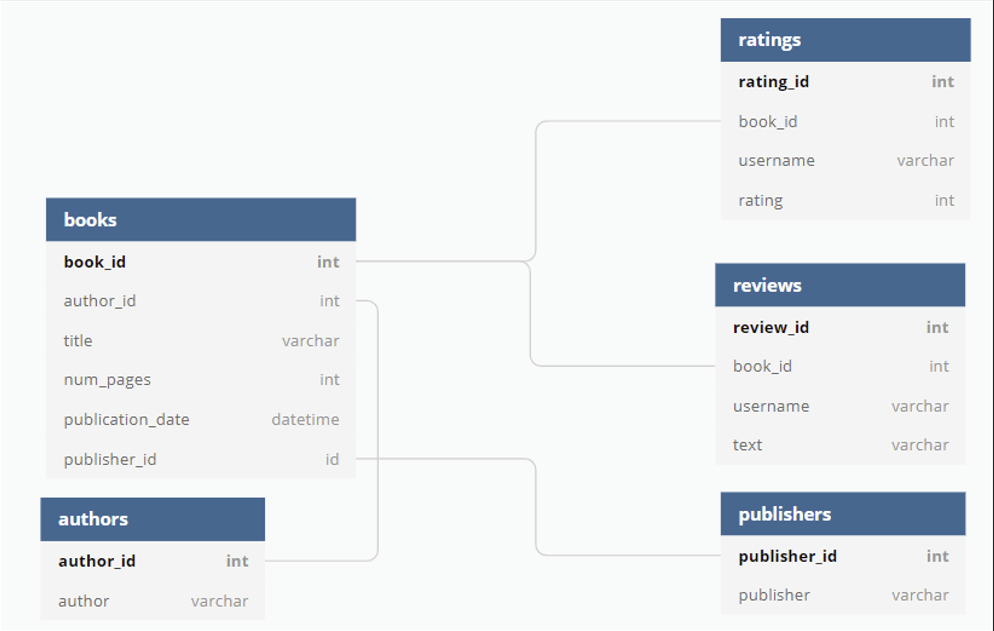

## Подключение к базе данных

In [1]:
!pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': '#####', # имя пользователя
'pwd': '#####', # пароль
'host': '#####',
'port': ####, # порт подключения
'db': '#####'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Обзор таблиц

### `books`

In [3]:
query = '''

SELECT *
FROM books
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### `authors`

In [4]:
query = '''

SELECT *
FROM authors
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### `publishers`

In [5]:
query = '''

SELECT *
FROM publishers
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### `ratings`

In [6]:
query = '''

SELECT *
FROM ratings
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### `reviews`

In [7]:
query = '''

SELECT *
FROM reviews
LIMIT 5

'''

pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Задания

### Посчитаем, сколько книг вышло после 1 января 2000 года

In [8]:
query = '''

SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''

pd.io.sql.read_sql(query, con = engine)

,count
0,819


819 произведений были опубликованы после 1 января 2000 года - подписка имеет обширную библиотеку современных произведений.

### Для каждой книги посчитаем количество обзоров и среднюю оценку

In [9]:
query = '''

SELECT b.book_id, 
       b.title, 
       COUNT(DISTINCT rv.review_id) AS cnt_reviews, 
       ROUND(AVG(r.rating),3) AS avg_rating
FROM books AS b

LEFT JOIN reviews AS rv
ON b.book_id = rv.book_id

LEFT JOIN  ratings AS r
ON b.book_id = r.book_id

GROUP BY b.book_id, b.title
ORDER BY cnt_reviews DESC

'''

pd.io.sql.read_sql(query, con = engine)

,book_id,title,cnt_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.663
1,963,Water for Elephants,6,3.977
2,734,The Glass Castle,6,4.207
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.415
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.667
996,808,The Natural Way to Draw,0,3.000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000
998,221,Essential Tales and Poems,0,4.000


Всего в каталоге 1000 произведений.

Первая часть серии книг "Сумерки" имеет 7 обзоров и является лидером по их количеству.\
Остальные произведения сервиса имеют от 6 обзоров до их отсутствия.

Также по каждому произведению указан их средний рейтинг.\
Можно отметить, что количество обзоров на книгу не коррелирует со средним рейтингом, т.к. речь идет исключительно о вкусовых предпочтениях пользователей.

### Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

In [10]:
query = '''

WITH 
-- исключаем брошюры --
tab AS (
SELECT publisher_id,
       book_id
FROM books
WHERE num_pages > 50
)

SELECT tab.publisher_id,
       p.publisher
FROM tab 

INNER JOIN publishers AS p
ON tab.publisher_id = p.publisher_id

GROUP BY tab.publisher_id, p.publisher
ORDER BY COUNT(tab.book_id) DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,212,Penguin Books


Наиболее широко представлены произведения с размером более 50 страниц от издательства Penguin Books (британское издательство, основанное в 1935 году в Лондоне сэром Алленом Лейном и его братьями Ричардом и Джоном).

### Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками

In [11]:
query = '''

WITH 

--отбираем книги с количеством оценок 50 и более--
tab AS (
SELECT book_id
FROM ratings
GROUP BY book_id
HAVING COUNT(rating_id) >= 50)


SELECT a.author_id, 
       a.author, 
       AVG(r.rating) AS avg_rating
FROM books AS b

INNER JOIN tab
ON b.book_id = tab.book_id

INNER JOIN authors AS a
ON b.author_id = a.author_id

INNER JOIN ratings AS r
ON tab.book_id = r.book_id

GROUP BY a.author_id, a.author
ORDER BY AVG(r.rating) DESC

LIMIT 1

'''

pd.io.sql.read_sql(query, con = engine)

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.287097


Самые высокий средний рейтинг книг - 4,29 баллов (по 5-балльной шкале) у Джоан Роулинг, автора вселенной о Гарри Поттере.\
Также в авторстве указан американский иллюстратор Мари Гранпрэ, которая подготовила иллюстрации к обложкам и главам книг.

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [12]:
query = '''

SELECT COUNT(DISTINCT rv.text)/ COUNT(DISTINCT rv.username) AS avg_rv_count
FROM ratings AS r

INNER JOIN reviews AS rv
ON r.username = rv.username

WHERE r.username in ( 
                    SELECT username
                    FROM ratings
                    GROUP BY username
                    HAVING COUNT(rating_id) > 48
                    )

'''

pd.io.sql.read_sql(query, con = engine)

,avg_rv_count
0,24


В среднем, активные пользователи, поставившие более 48 оценок, написали обзоры на 24 книги.